In [1]:
import tensorflow as tf

In [2]:
import eval_lib

In [3]:
tf.app.flags.DEFINE_string('f', '','dummy')

In [4]:
info = eval_lib.get_info()

Instructions for updating:
Please switch to tf.train.get_or_create_global_step
INFO:tensorflow:Scale of 0 disables regularizer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please switch to tf.metrics.accuracy. Note that the order of the labels and predictions arguments has been switched.
Instructions for updating:
Please use `streaming_sparse_recall_at_k`, and reshape labels from [batch_size] to [batch_size, 1].
INFO:tensorflow:Evaluating resnet_v2_50_plants_non_exif/model.ckpt-4211


In [5]:
sess = eval_lib.get_monitored_session(info['checkpoint_path'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from resnet_v2_50_plants_non_exif/model.ckpt-4211
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [6]:
params = {
    k: v
    for k, v in info.items()
    if isinstance(v, tf.Tensor)
}

In [7]:
res = sess.run(params)

In [8]:
images = res['images']
raw_images = res['raw_images']

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

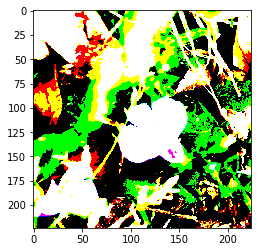

In [10]:
plt.imshow(images[0])

In [11]:
from io import BytesIO
import PIL
from IPython.display import display, Image
import numpy as np

def display_img_array(ima):
    #ima = np.ascontiguousarray(ima)
    ima = ima.astype('uint8')
    im = PIL.Image.fromarray(ima, mode='RGB')
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

In [12]:
predictions = res['predictions']
labels = res['labels']
labels_to_names = info['labels_to_names']

predicted: 通泉草
actual: 通泉草


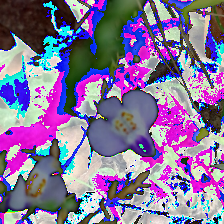

predicted: 通泉草
actual: 通泉草


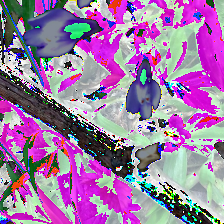

predicted: 久留米杜鵑
actual: 久留米杜鵑


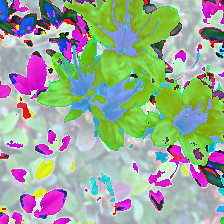

predicted: 通泉草
actual: 通泉草


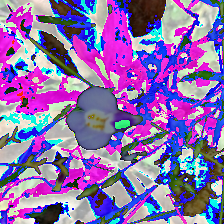

predicted: 平戶杜鵑
actual: 平戶杜鵑


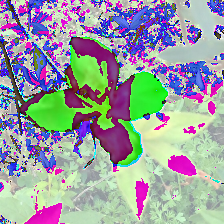

predicted: 著生杜鵑
actual: 著生杜鵑


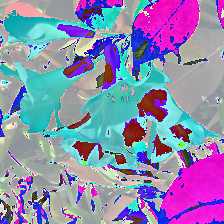

predicted: 酢漿草
actual: 酢漿草


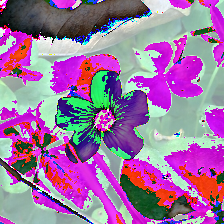

predicted: 久留米杜鵑
actual: 久留米杜鵑


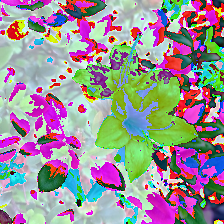

predicted: 通泉草
actual: 通泉草


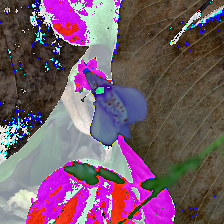

predicted: 著生杜鵑
actual: 著生杜鵑


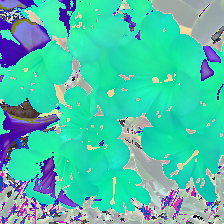

predicted: 平戶杜鵑
actual: 平戶杜鵑


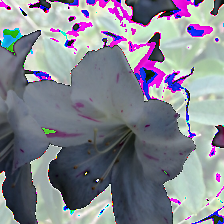

predicted: 四季秋海棠
actual: 四季秋海棠


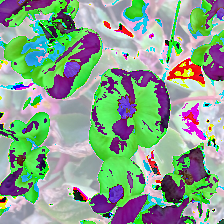

predicted: 著生杜鵑
actual: 著生杜鵑


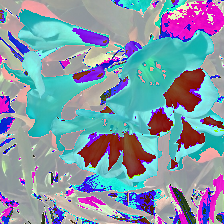

predicted: 蛇莓
actual: 蛇莓


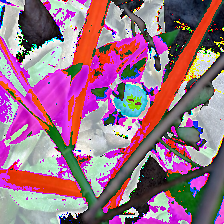

predicted: 通泉草
actual: 通泉草


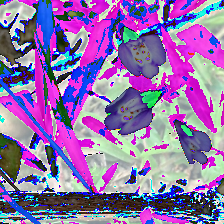

predicted: 平戶杜鵑
actual: 平戶杜鵑


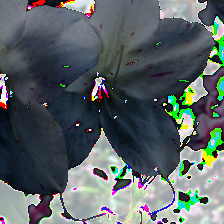

predicted: 杜鵑花仙子
actual: 杜鵑花仙子


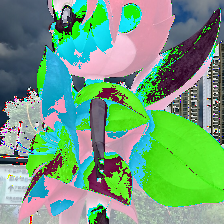

predicted: 久留米杜鵑
actual: 久留米杜鵑


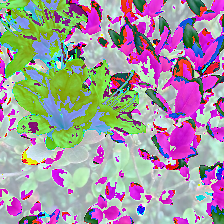

predicted: 平戶杜鵑
actual: 平戶杜鵑


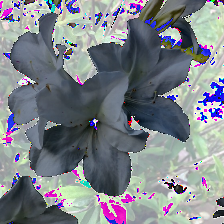

predicted: 萬壽菊
actual: 萬壽菊


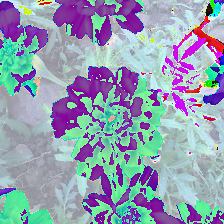

predicted: 蛇莓
actual: 蛇莓


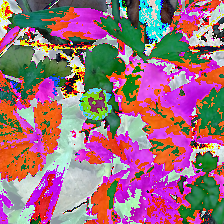

predicted: 酢漿草
actual: 酢漿草


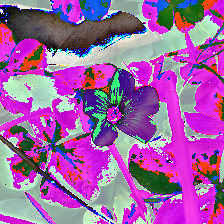

predicted: 蛇莓
actual: 蛇莓


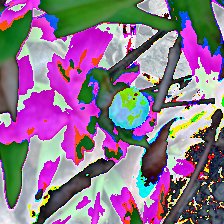

predicted: 著生杜鵑
actual: 著生杜鵑


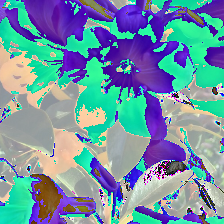

predicted: 通泉草
actual: 通泉草


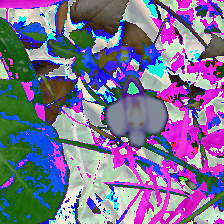

predicted: 蛇莓
actual: 蛇莓


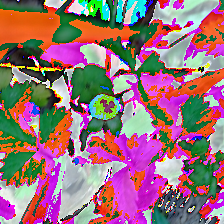

predicted: 萬壽菊
actual: 萬壽菊


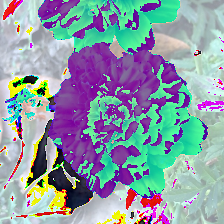

predicted: 酢漿草
actual: 酢漿草


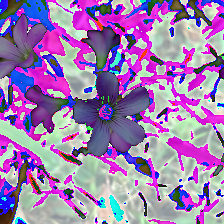

predicted: 四季秋海棠
actual: 四季秋海棠


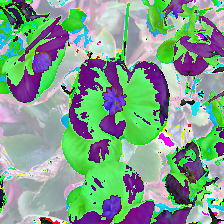

predicted: 著生杜鵑
actual: 著生杜鵑


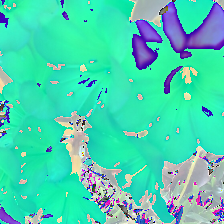

predicted: 著生杜鵑
actual: 著生杜鵑


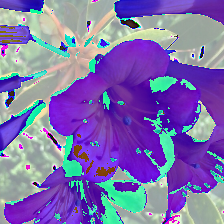

predicted: 蛇莓
actual: 蛇莓


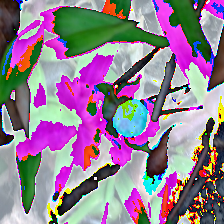

predicted: 平戶杜鵑
actual: 平戶杜鵑


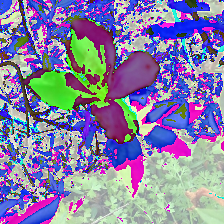

predicted: 杜鵑花仙子
actual: 杜鵑花仙子


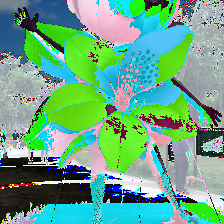

predicted: 平戶杜鵑
actual: 平戶杜鵑


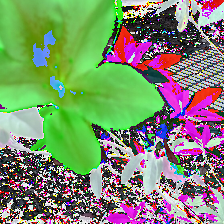

predicted: 平戶杜鵑
actual: 平戶杜鵑


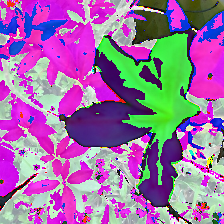

predicted: 通泉草
actual: 通泉草


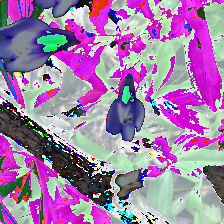

predicted: 平戶杜鵑
actual: 平戶杜鵑


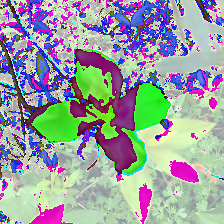

predicted: 平戶杜鵑
actual: 平戶杜鵑


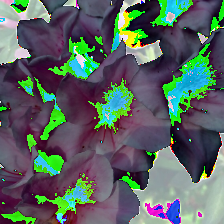

predicted: 著生杜鵑
actual: 著生杜鵑


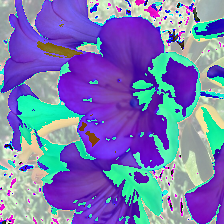

In [ ]:
for i, img in enumerate(images):
    print 'predicted:', labels_to_names[predictions[i]]
    print 'actual:',labels_to_names[labels[i]]
    #print(predictions[i], labels[i])
    #print(type(img), img.shape)
    #print(img)
    display_img_array(img)
    #plt.imshow(img)
    
    #break
    
    #plt.imshow(img)

In [ ]:
raw_images.shape

In [ ]:
images.shape

In [ ]:
1.0 * (predictions == labels).sum()/predictions.size

In [ ]:
predictions[predictions!=labels]

In [ ]:
labels[predictions!=labels]

In [ ]:
for i in np.where(predictions!=labels):
    print('predicted: %s'% labels_to_names[predictions[i][0]])
    print('actual: %s'% labels_to_names[labels[i][0]])
    display_img_array(images[i][0])